# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [19]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology, color

import cv2


# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

![image.png](attachment:image.png)

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


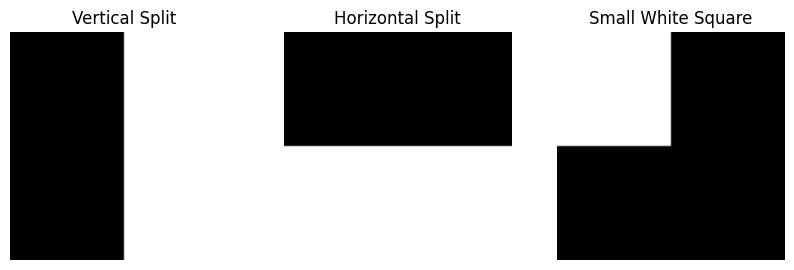

In [2]:
# solution

img1 = np.zeros((100,100)) # Create a black image
img1[: , 50 :] = 255 # Set the right half of the image to white

img2 = np.zeros((100,100))
img2[50: , :] = 255 # Set the bottom half of the image to white

img3 = np.zeros((100,100))
img3[:50 , :50] = 255 # Set the center of the image to white

fig, axes = plt.subplots(1, 3, figsize=(10, 4))

axes[0].imshow(img1, cmap='gray')
axes[0].axis('off')
axes[0].set_title("Vertical Split")

axes[1].imshow(img2, cmap='gray')
axes[1].axis('off')
axes[1].set_title("Horizontal Split")

axes[2].imshow(img3, cmap='gray')
axes[2].axis('off')
axes[2].set_title("Small White Square")

plt.show()

*   Use the above three images to create the following image

![image-2.png](attachment:image-2.png)
*Hint: Remember channels and color spaces*

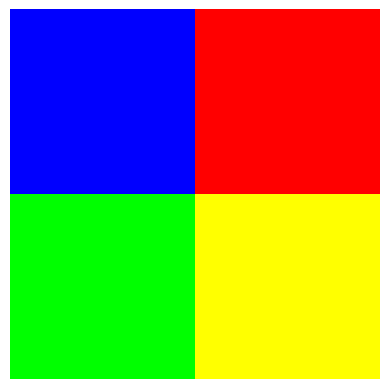

In [3]:
# solution
import numpy as np
import matplotlib.pyplot as plt

size = (100, 100, 3)  # 3 channels for RGB

# Create a black image
image = np.zeros(size, dtype=np.uint8)

# Define colors (RGB format)
blue = [0, 0, 255]      # Top-left
red = [255, 0, 0]       # Top-right
green = [0, 255, 0]     # Bottom-left
yellow = [255, 255, 0]  # Bottom-right

# Assign colors to the four quadrants
image[:50, :50] = blue      # Top-left
image[:50, 50:] = red       # Top-right
image[50:, :50] = green     # Bottom-left
image[50:, 50:] = yellow    # Bottom-right

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()


### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

![image.png](attachment:image.png)

*   Extract individual channels and plot them using matplotlib subplot.



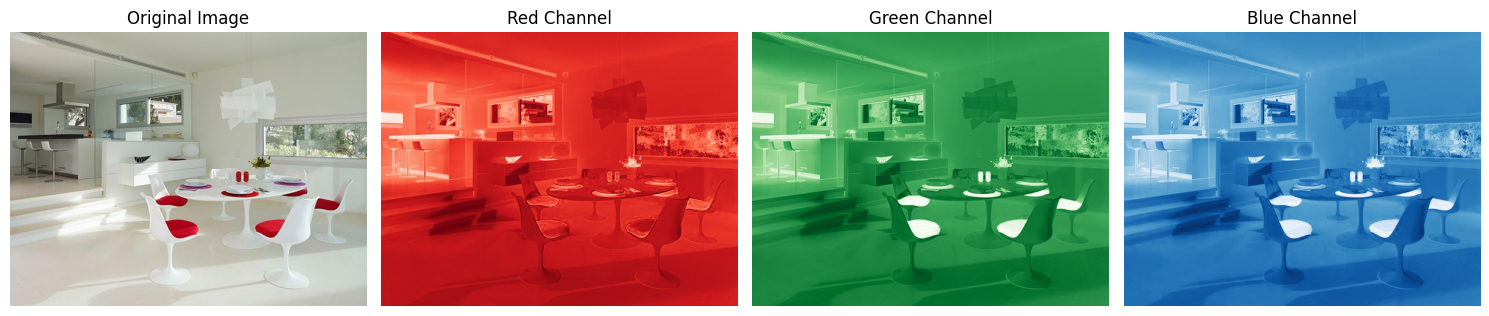

In [6]:
# solution

# Read the image
image = io.imread('images/sillas.jpg')


# Extract individual channels
red_channel = image[:, :, 0]   # Red channel
green_channel = image[:, :, 1] # Green channel
blue_channel = image[:, :, 2]  # Blue channel

# Create subplots to display channels separately
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Original image
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis('off')

# Red channel
axes[1].imshow(red_channel, cmap='Reds')
axes[1].set_title("Red Channel")
axes[1].axis('off')

# Green channel
axes[2].imshow(green_channel, cmap='Greens')
axes[2].set_title("Green Channel")
axes[2].axis('off')

# Blue channel
axes[3].imshow(blue_channel, cmap='Blues')
axes[3].set_title("Blue Channel")
axes[3].axis('off')

plt.tight_layout()
plt.show()




*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

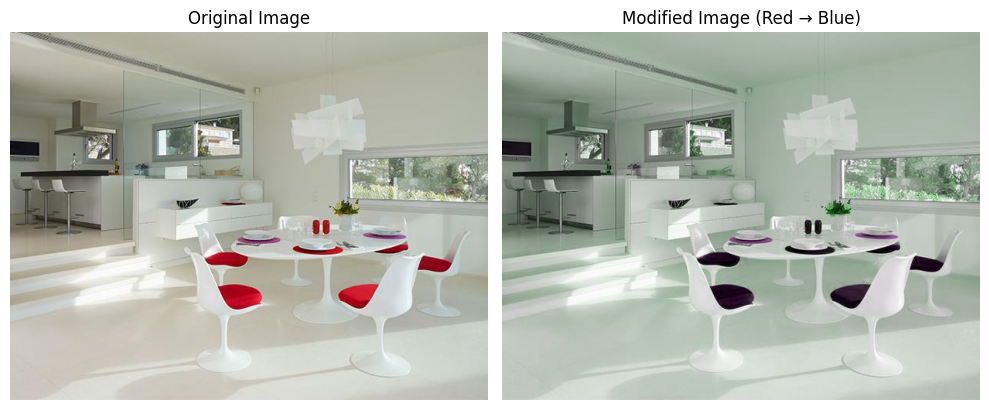

In [7]:
# solution

modified_image = image.copy()
modified_image[:, :, 0] = image[:, :, 2]  # Red -> Blue

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original image
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis('off')

# Modified image
axes[1].imshow(modified_image)
axes[1].set_title("Modified Image (Red → Blue)")
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

![image.png](attachment:image.png)

In [16]:
# Load the images
model = io.imread('images/model.png')
coat = io.imread('images/coat.png')
texture = io.imread('images/texture.png')


# Convert the coat image to grayscale to create a mask
gray_coat = cv2.cvtColor(coat, cv2.COLOR_RGB2GRAY)
_, mask = cv2.threshold(gray_coat, 1, 255, cv2.THRESH_BINARY)

# Invert the mask to extract the model without the coat
mask_inv = cv2.bitwise_not(mask)
model_without_coat = cv2.bitwise_and(model, model, mask=mask_inv)

# Resize the texture to match the coat size
texture_resized = cv2.resize(texture, (coat.shape[1], coat.shape[0]))

# Apply the mask to keep only the coat shape from the texture
textured_coat = cv2.bitwise_and(texture_resized, texture_resized, mask=mask)

# Ensure the model image has only 3 channels
if model_without_coat.shape[2] == 4:
    model_without_coat = cv2.cvtColor(model_without_coat, cv2.COLOR_RGBA2RGB)

# Merge the new coat with the model
final_result = cv2.add(model_without_coat, textured_coat)



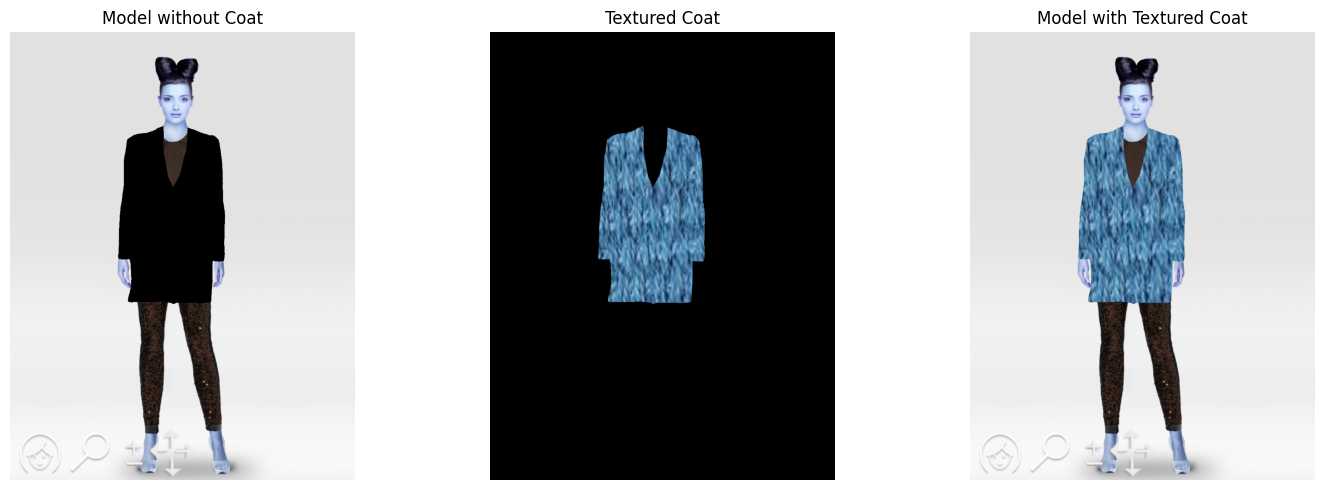

In [17]:
# Display the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(cv2.cvtColor(model_without_coat, cv2.COLOR_BGR2RGB))
axes[0].set_title("Model without Coat")
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(textured_coat, cv2.COLOR_BGR2RGB))
axes[1].set_title("Textured Coat")
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(final_result, cv2.COLOR_BGR2RGB))
axes[2].set_title("Model with Textured Coat")
axes[2].axis('off')

plt.tight_layout()
plt.show()


# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




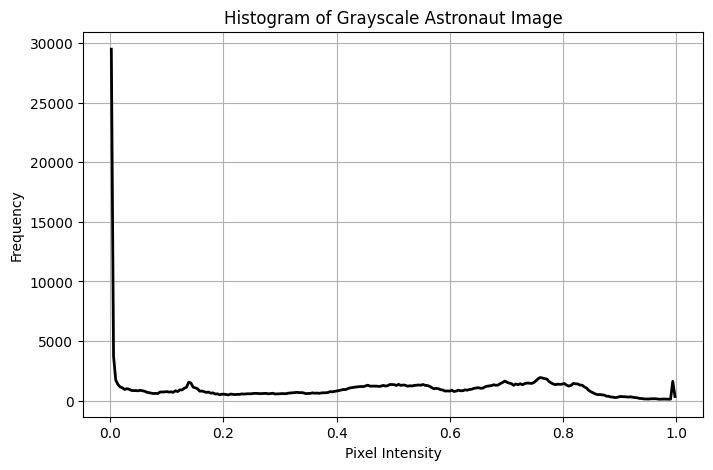

In [20]:
# solution

# Load the 'astronaut' image
image = data.astronaut()

# Convert to grayscale
gray_image = color.rgb2gray(image)

# Compute histogram
hist, bin_centers = exposure.histogram(gray_image)

# Plot histogram
plt.figure(figsize=(8, 5))
plt.plot(bin_centers, hist, lw=2, color='black')
plt.title('Histogram of Grayscale Astronaut Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

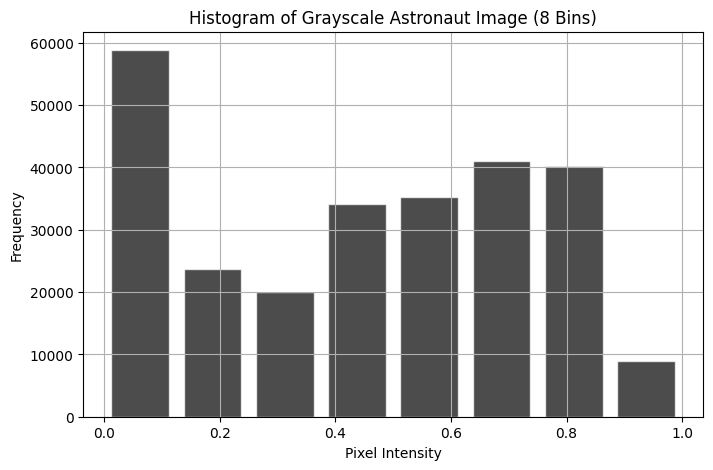

In [21]:
# solution

hist, bin_edges = np.histogram(gray_image, bins=8, range=(0, 1))

# Compute bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot histogram
plt.figure(figsize=(8, 5))
plt.bar(bin_centers, hist, width=0.1, color='black', alpha=0.7, edgecolor='white')
plt.title('Histogram of Grayscale Astronaut Image (8 Bins)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

*A low bin count merges wide intensity ranges, losing details. A high bin count shows finer details but may introduce noise. The optimal count depends on the goal: fewer bins for an overview, more for detailed analysis.*

...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


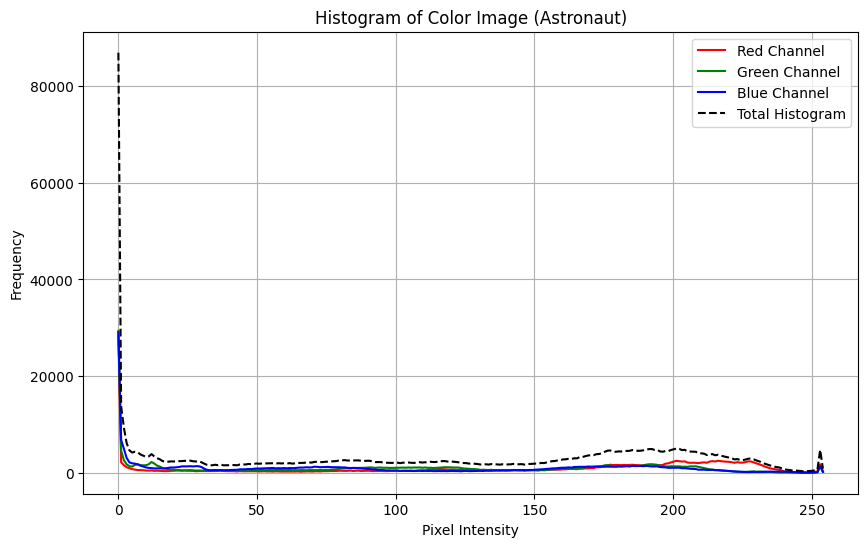

In [22]:
#solution
import matplotlib.pyplot as plt
import numpy as np
from skimage import data

# Load the 'astronaut' image
image = data.astronaut()

# Extract RGB channels
red_channel = image[:, :, 0]
green_channel = image[:, :, 1]
blue_channel = image[:, :, 2]

# Compute histograms
bins = 256  # Use 256 bins for full range of intensity values (0-255)
hist_red, bin_edges = np.histogram(red_channel, bins=bins, range=(0, 255))
hist_green, _ = np.histogram(green_channel, bins=bins, range=(0, 255))
hist_blue, _ = np.histogram(blue_channel, bins=bins, range=(0, 255))

# Compute total histogram (sum of all channels)
hist_total = hist_red + hist_green + hist_blue

# Plot histograms
plt.figure(figsize=(10, 6))
plt.plot(bin_edges[:-1], hist_red, color='red', label='Red Channel')
plt.plot(bin_edges[:-1], hist_green, color='green', label='Green Channel')
plt.plot(bin_edges[:-1], hist_blue, color='blue', label='Blue Channel')
plt.plot(bin_edges[:-1], hist_total, color='black', linestyle='dashed', label='Total Histogram')

# Formatting
plt.title('Histogram of Color Image (Astronaut)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



In [23]:
# solution

image = io.imread('images/aquatermi_lowcontrast.jpg')

# Convert to grayscale
gray_image = color.rgb2gray(image) if len(image.shape) == 3 else image

# Compute histogram of the original image
hist_orig, bins_orig = np.histogram(gray_image, bins=256, range=(0, 1))

# Perform histogram equalization
equalized_image = exposure.equalize_hist(gray_image)

# Compute histogram of the equalized image
hist_eq, bins_eq = np.histogram(equalized_image, bins=256, range=(0, 1))


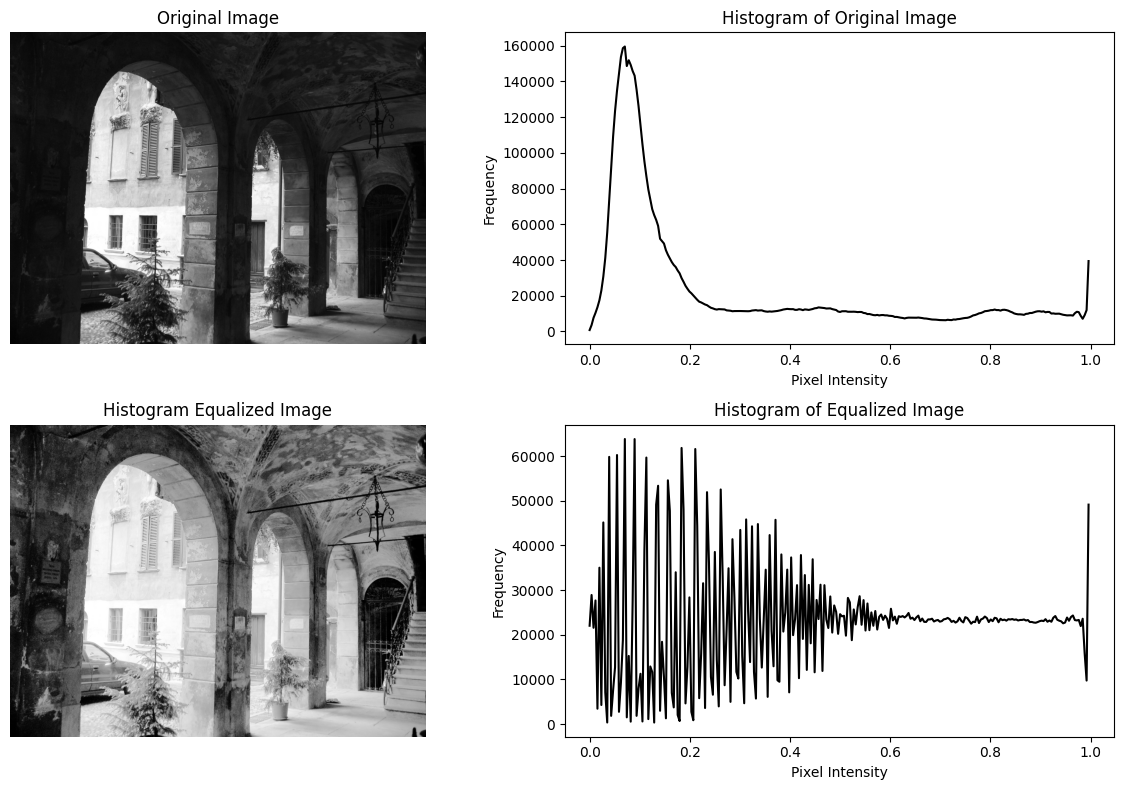

In [24]:
# Plot original and equalized images along with their histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Original image
axes[0, 0].imshow(gray_image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Histogram of the original image
axes[0, 1].plot(bins_orig[:-1], hist_orig, color='black')
axes[0, 1].set_title('Histogram of Original Image')
axes[0, 1].set_xlabel('Pixel Intensity')
axes[0, 1].set_ylabel('Frequency')

# Equalized image
axes[1, 0].imshow(equalized_image, cmap='gray')
axes[1, 0].set_title('Histogram Equalized Image')
axes[1, 0].axis('off')

# Histogram of the equalized image
axes[1, 1].plot(bins_eq[:-1], hist_eq, color='black')
axes[1, 1].set_title('Histogram of Equalized Image')
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()



*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

*Linear Contrast Stretching does not normalize the histogram in the same way as Histogram Equalization does. It is expands the histogram but maintains its overall shape. It scales pixel values to fit within a desired range (e.g., 0 to 255) using min-max scaling. However, it does not redistribute pixel intensities to achieve a uniform histogram.*

...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function).
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



In [25]:
# solution
def linear_contrast_stretch(image, bins=256):

    # Compute min and max pixel values
    min_val = np.min(image)
    max_val = np.max(image)

    # Apply min-max scaling
    stretched_image = (image - min_val) * (255 / (max_val - min_val))
    stretched_image = np.clip(stretched_image, 0, 255).astype(np.uint8)

    return stretched_image


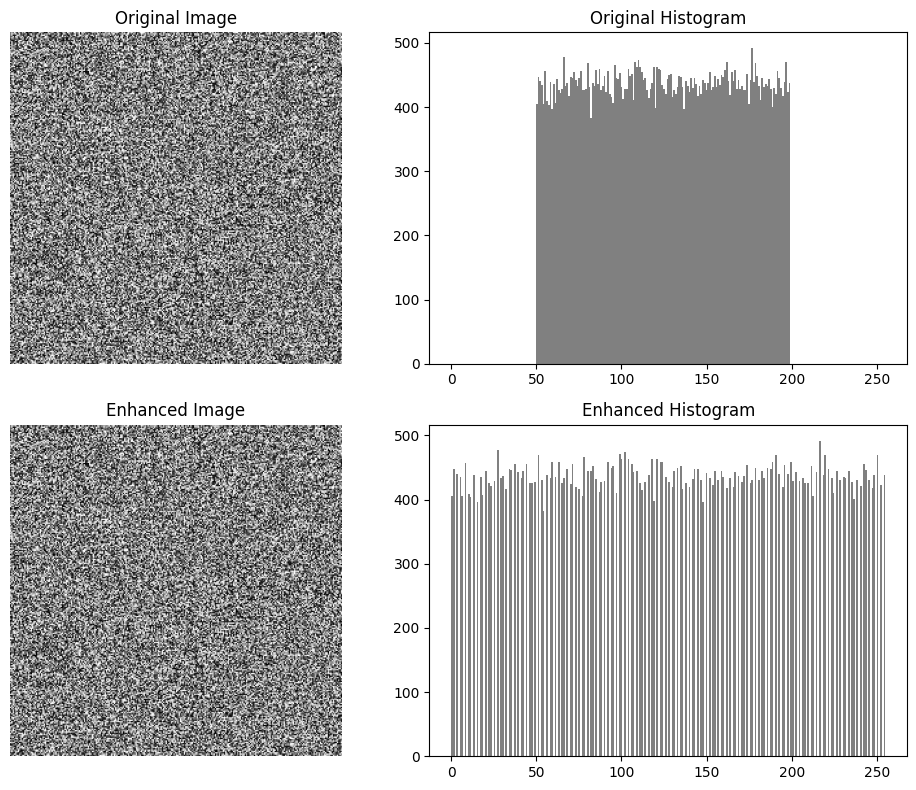

In [26]:
# Load a sample grayscale image
image = np.random.randint(50, 200, (256, 256), dtype=np.uint8)  # Simulated grayscale image

# Apply linear contrast stretch
enhanced_image = linear_contrast_stretch(image)

# Plot the original and enhanced images with histograms
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Original Image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

# Histogram of Original Image
axes[0, 1].hist(image.ravel(), bins=256, range=[0, 255], color='gray')
axes[0, 1].set_title("Original Histogram")

# Enhanced Image
axes[1, 0].imshow(enhanced_image, cmap='gray')
axes[1, 0].set_title("Enhanced Image")
axes[1, 0].axis("off")

# Histogram of Enhanced Image
axes[1, 1].hist(enhanced_image.ravel(), bins=256, range=[0, 255], color='gray')
axes[1, 1].set_title("Enhanced Histogram")

plt.tight_layout()
plt.show()


# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




In [28]:
# solution
from skimage.morphology import disk
from skimage.filters.rank import mean

# Load the coins image
image = data.coins()

# Define different structuring elements (selem)
selem_20 = disk(20)
selem_30 = disk(30)
selem_10 = disk(10)

# Apply mean filter with different radii
smoothed_20 = mean(image, selem_20)
smoothed_30 = mean(image, selem_30)
smoothed_10 = mean(image, selem_10)


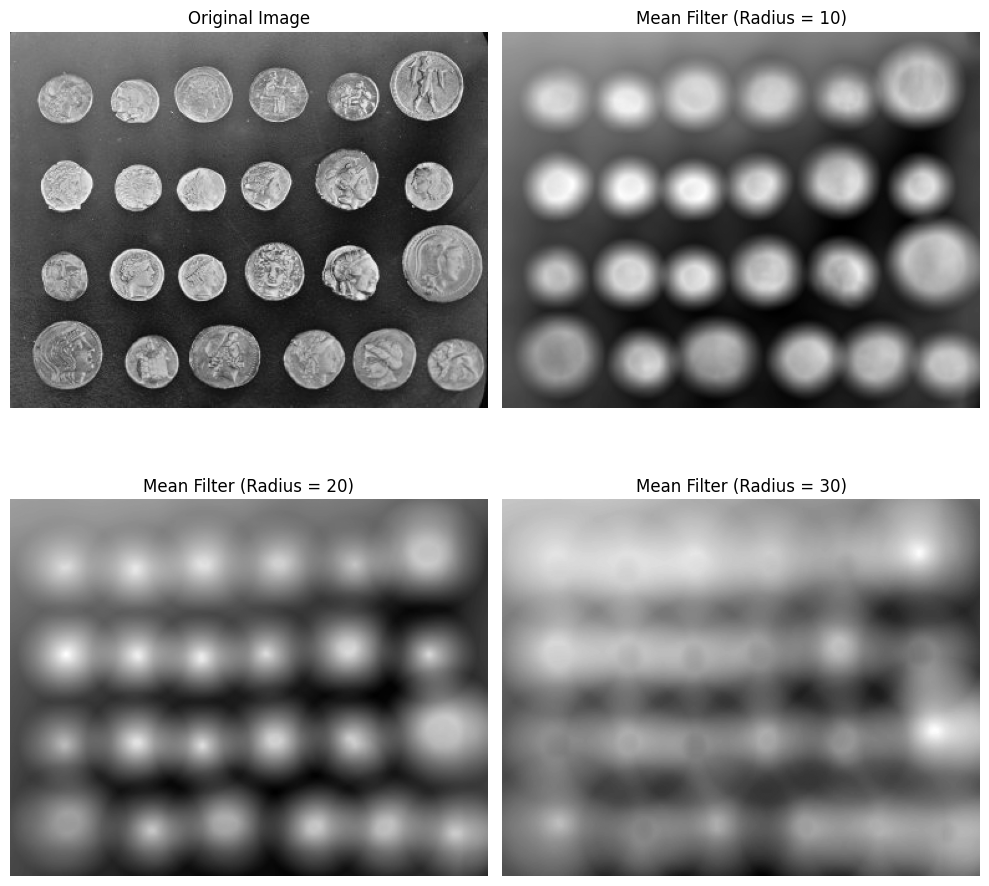

In [29]:
# Plot original and filtered images
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel()

axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(smoothed_10, cmap='gray')
axes[1].set_title("Mean Filter (Radius = 10)")
axes[1].axis("off")

axes[2].imshow(smoothed_20, cmap='gray')
axes[2].set_title("Mean Filter (Radius = 20)")
axes[2].axis("off")

axes[3].imshow(smoothed_30, cmap='gray')
axes[3].set_title("Mean Filter (Radius = 30)")
axes[3].axis("off")

plt.tight_layout()
plt.show()


*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

<ipython-input-30-299b19420f2f>:9: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  "Square": square(20),
<ipython-input-30-299b19420f2f>:10: FutureWarning: `rectangle` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  "Rectangle": rectangle(20, 30),


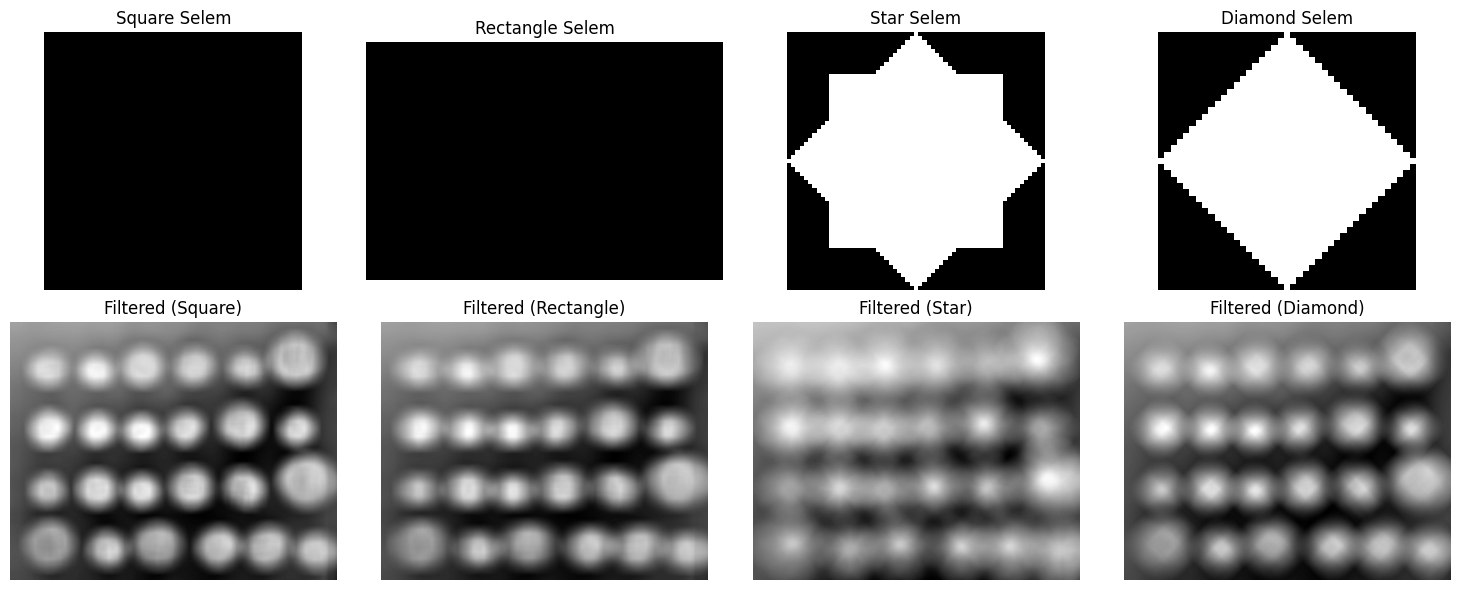

In [30]:
# solution

from skimage.morphology import square, rectangle, star, diamond

image = data.coins()

# Define different structuring elements (selem)
selems = {
    "Square": square(20),
    "Rectangle": rectangle(20, 30),
    "Star": star(20),
    "Diamond": diamond(20)
}

# Apply mean filter with different structuring elements
filtered_images = {name: mean(image, selem) for name, selem in selems.items()}

# Plot structuring elements and filtered images
fig, axes = plt.subplots(2, len(selems), figsize=(15, 6))

for i, (name, selem) in enumerate(selems.items()):
    # Show structuring element
    axes[0, i].imshow(selem, cmap='gray')
    axes[0, i].set_title(f"{name} Selem")
    axes[0, i].axis("off")

    # Show corresponding filtered image
    axes[1, i].imshow(filtered_images[name], cmap='gray')
    axes[1, i].set_title(f"Filtered ({name})")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()

*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

*Increasing the radius of the disk structuring element in the mean filter enhances the smoothing effect. A smaller radius reduces noise while preserving details, whereas a larger radius causes significant blurring and loss of edges and fine structures. Therefore, the optimal choice depends on balancing noise reduction and detail preservation.*

...


*   What is the observed behaviour with difference in the structuring element?



**Solution**

*Different structuring elements affect the smoothing pattern in the mean filter. A square or rectangle provides uniform blurring but may introduce directional artifacts. A diamond offers smoother transitions, while a star can preserve some fine details due to its unique shape. The choice of structuring element influences how edges and textures are processed in the filtered image.*

...



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

A mean filter is a simple averaging filter that smooths an image by replacing each pixel with the average of its neighboring pixels, effectively reducing noise but also blurring edges. A Gaussian filter is a weighted average filter, where the center pixel has the highest weight, and the weights decrease with distance from the center according to a Gaussian distribution, preserving edges better than the mean filter.

Mean filters are used when the goal is to reduce high-frequency noise (like salt-and-pepper noise) without much concern for edge preservation. Gaussian filters are preferred when a more refined smoothing is needed, especially when dealing with Gaussian noise or when edge preservation is important.

...